### scopo e riferimenti

- proposta di un mini scheduler per il *toy-model*

  come si gestice il tempo e la sequenza degli accadimenti
  
  
- sito di riferimento per exec() usato per eseguire instruzioni memorizzate come testo: https://www.tutorialsteacher.com/python/exec-method


- uso dell'espediente commonVar.py per avere variabili condivise nel codice

  nella cartella si trova commonVar.py che contiene solo una riga di commento
  
      # commonVar

In [2]:
%matplotlib inline
import commonVar as common
import random as r
import matplotlib.pyplot as plt #

In [4]:
common.nCycles=20
common.nAgents=10
common.wMin=60
common.wMax=100
common.mMin=50
common.mMax=150
common.actionList=[]
common.actionList.append("eat(False)")
common.actionList.append("giveMoney")
common.share=0.10

### agenti e loro capacità

In [3]:
class Agent():
    def __init__(self, num, weight, money):
        print("agent # ", num, "with weight", weight, "with money", money)
        self.num=num
        self.weight=weight
        self.money=money
        common.agentList.append(self)
        
    def eat(self, out):
        currentWeight= self.weight + r.uniform(-10,10)
        if currentWeight > 80:
            if out:
                print ("Too fat, I cannot eat")
        else: 
            if out: print ("With pleasure")
            common.eating[common.t]+=1
            
    def giveMoney(self):
        giving=self.money*common.share
        self.money-=giving
        common.agentList[r.randint(common.nAgents)].money+=giving
        

In [12]:
common.agentList=[]

for n in range(common.nAgents):
    Agent(n+1,r.randint(common.wMin,common.wMax),r.uniform(common.mMin,common.mMax))

agent #  1 with weight 66 with money 130.16541573174186
agent #  2 with weight 79 with money 144.6321515574723
agent #  3 with weight 96 with money 50.39184614846204
agent #  4 with weight 99 with money 88.44622787685812
agent #  5 with weight 98 with money 66.43316661886999
agent #  6 with weight 83 with money 143.01909176791997
agent #  7 with weight 68 with money 111.53586265205777
agent #  8 with weight 81 with money 87.94890788455962
agent #  9 with weight 81 with money 60.82087404728941
agent #  10 with weight 80 with money 144.90449806405147


In [13]:
common.agentList

In [14]:
common.eating=[]

for common.t in range(common.nCycles):
    common.eating.append(0)
    
    for anAgent in common.agentList:
        for anAction in common.actionList:
            exec("anAgent" + "." + anAction)

### how many eating

<BarContainer object of 20 artists>

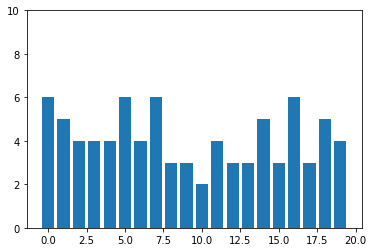

In [20]:
plt.ylim((0,10))
plt.bar(range(common.nCycles),common.eating)

### agent's money

<BarContainer object of 10 artists>

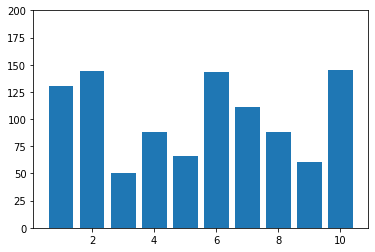

In [21]:
plt.ylim((0,200))
plt.bar(range(1,common.nAgents+1),list(common.agentList[i].money for i in range(common.nAgents)))